# 데이터 로드

In [1]:
import json
from glob import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from konlpy.tag import Kkma
import parmap
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
from konlpy.corpus import kobill

In [2]:
json_list = [os.path.abspath(i) for i in glob('./2022*.json')]

In [3]:
json_list

['/home/crb123/from113/watson_ko/20220704.json',
 '/home/crb123/from113/watson_ko/20220304.json',
 '/home/crb123/from113/watson_ko/20220804.json',
 '/home/crb123/from113/watson_ko/20220204.json',
 '/home/crb123/from113/watson_ko/20220404.json',
 '/home/crb123/from113/watson_ko/20220604.json',
 '/home/crb123/from113/watson_ko/20220504.json']

In [4]:
t2 = json.load(open('/home/crb123/from113/watson_ko/20220204.json', 'r'))
t3 = json.load(open('/home/crb123/from113/watson_ko/20220304.json', 'r'))
t4 = json.load(open('/home/crb123/from113/watson_ko/20220404.json', 'r'))
t5 = json.load(open('/home/crb123/from113/watson_ko/20220504.json', 'r'))
t6 = json.load(open('/home/crb123/from113/watson_ko/20220604.json', 'r'))
t7 = json.load(open('/home/crb123/from113/watson_ko/20220704.json', 'r'))
t8 = json.load(open('/home/crb123/from113/watson_ko/20220804.json', 'r'))

In [5]:
t7['status_code']

'200'

In [6]:
t8.keys()

dict_keys(['version', 'data_id', 'requests_date', 'response_date', 'status_code', 'data_investing', 'data_kospi'])

In [7]:
len(t8['data_investing'])

4394

In [8]:
t8['data_investing'][0]

{'title': '원주금융회계고 송지우 학생, 한국은행 공개채용 합격 쾌거',
 'url': 'http://m.koreasisailbo.com/676394',
 'host': 'm.koreasisailbo.com',
 'imgurl': 'https://f.xza.co.kr/http://www.koreasisailbo.com/data/koreasisailbo_com/mainimages/202208/20220803162313-18807.jpg',
 'docsent': 'positive',
 'sentscore': '0.888671',
 'text': '시작페이지로l즐겨찾기lRSSl편집 2022.08.03 [17:30] 전체기사l로그인lID/PW 찾기 원주금융회계고 송지우 학생, 한국은행 공개채용 합격 쾌거 전체댓글보기 회사소개 ㅣ 연혁 ㅣ 회원약관 ㅣ 개인정보취급방침 ㅣ 청소년보호정책 ㅣ 편집위원회 ㅣ 고충처리인 ㅣ 광고/제휴 안내 ㅣ 기사제보 ㅣ 보도자료 ㅣ 기사검색 시사일보-이 시대의 신문고ㅣ등록번호 :'}

# 데이터 합치기

In [9]:
dfs = []
for json_path in json_list:
    t = json.load(open(json_path, 'r'))
    tt= pd.DataFrame(t['data_investing'])
    col = json_path.split('/')[-1].split('.')[0]
    tt['date'] = col
    dfs.append(tt)

concatenated_data = pd.concat(dfs).reset_index(drop=True)

In [10]:
concatenated_data.shape

(26454, 8)

In [11]:
concatenated_data.columns

Index(['title', 'url', 'host', 'imgurl', 'docsent', 'sentscore', 'text',
       'date'],
      dtype='object')

In [12]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26454 entries, 0 to 26453
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      26454 non-null  object
 1   url        26454 non-null  object
 2   host       26454 non-null  object
 3   imgurl     26454 non-null  object
 4   docsent    26454 non-null  object
 5   sentscore  26454 non-null  object
 6   text       26454 non-null  object
 7   date       26454 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [13]:
concatenated_data.describe()

,title,url,host,imgurl,docsent,sentscore,text,date
count,26454,26454,26454,26454,26454,26454,26454,26454
unique,26294,26442,1014,22628,3,6164,24009,7
top,은행간 단기금리 기준-코리보(03일),https://www.itooza.com/,v.daum.net,https://i.incru.it/ui/static/image/common/n_co...,neutral,0.0,,20220204
freq,5,5,1134,810,20190,20190,1431,5836


In [14]:
concatenated_data['docsent'].value_counts()

neutral     20190
positive     4066
negative     2198
Name: docsent, dtype: int64

- docsent > 0 : positive
- docsent = 0 : neutral
- docsent < 0 : negative

# konlpy, JPype1 설치

- pip install JPype1
- pip3 install konlpy

In [7]:
from konlpy.tag import Kkma

Kkma().pos('나는 사과가 좋다.')

[('나', 'VV'),
 ('는', 'ETD'),
 ('사과', 'NNG'),
 ('가', 'JKS'),
 ('좋', 'VA'),
 ('다', 'EFN'),
 ('.', 'SF')]

In [7]:
from konlpy.tag import Kkma

kkma = Kkma()
text = "꼬꼬마 형태소 분석기를 사용하는 예시입니다."
nouns = kkma.nouns(text)
morphs = kkma.morphs(text)
pos_tags = kkma.pos(text)

print("명사:", nouns)
print("형태소:", morphs)
print("품사 태깅:", pos_tags)

명사: ['꼬꼬마', '형태소', '분석기', '사용', '예시']
형태소: ['꼬꼬마', '형태소', '분석기', '를', '사용', '하', '는', '예시', '이', 'ㅂ니다', '.']
품사 태깅: [('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('사용', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('예시', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [8]:
concatenated_data['text'][0]

'IBK기업은행(은행장 윤종원)은 열악한 학습 환경 속에서도 학업에 매진하고 있는 중소기업 근로자 및 소상공인 자녀 517명에게 장학금 10억 2400만원을 전달했다고 3일 밝혔다.\n또 금융권 최초 중소기업 공동 직장 어린이집 설립, 멘토링, 금융경제교육 등 다양한 사회공헌 활동을 통해 중소기업 근로자를 꾸준히 지원하고 있다.\n또 장학생으로 선발된 대학생들이 향후 소외계층 아동들에게 학습지도 봉사활동을 하는 \'IBK멘토링\'에 참여하는 등 나눔의 의미가 확산될 수 있는 기회도 마련했다.\n장학금 후원에는 장학생의 가족이 근무하는 기업도 참여해 나눔의 의미를 더했다고 은행 측은 전했다.\n장학생으로 선발된 김지영(가명, 19)양은 "저를 포함한 자녀 3명의 교육비 때문에 허리가 휘도록 일하시는 부모님께 죄송했는데 기업은행의 장학금 지원으로 교육비 부담을 덜게 되어 감사하다 고 말했다.\n최성민(가명, 24)군은 "경영학과 컴퓨터공학을 복수 전공하는 동시에 스타트업의 근로자로서 새로운 도전에 대한 두려움도 있었지만 기업은행의 장학금 수혜로 할 수 있다는 용기를 얻었다 며 감사의 인사를 전했다.\n한편, 기업은행은 중소기업 근로자 가족의 복지향상을 위해 지난 2006년 IBK행복나눔재단을 설립해 총 615억원을 출연했으며 지금까지 장학금 179억원, 치료비 130억원 등을 후원했다.'

- 키워드 추출을 위해 konlpy와 tf-idf를 사용하여 키워드를 추출하는 방법

In [134]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import TfidfVectorizer

kkma = Kkma()
text = concatenated_data['text'][0]

# 문장에서 명사 추출
nouns = kkma.nouns(text)

# 명사 리스트를 공백으로 구분된 문자열로 변환
document = ' '.join(nouns)

# TfidfVectorizer를 사용하여 tf-idf 행렬 생성
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([document])

# 각 단어의 이름과 해당하는 tf-idf 값 출력
keywords = vectorizer.get_feature_names()
tfidf_scores = tfidf_matrix.toarray()[0]

# tf-idf 값이 높은 순서대로 키워드 추출
top_keywords = [keywords[i] for i in tfidf_scores.argsort()[::-1][:20]]
top_tfidf_scores = [tfidf_scores[i] for i in tfidf_scores.argsort()[::-1][:20]]

print("키워드 추출 결과:")
for keyword, score in zip(top_keywords, top_tfidf_scores):
    print(f"{keyword}: {score}")


키워드 추출 결과:
후원: 0.0949157995752499
다양: 0.0949157995752499
교육비: 0.0949157995752499
근로자: 0.0949157995752499
근무: 0.0949157995752499
금융: 0.0949157995752499
금융경제교육: 0.0949157995752499
금융권: 0.0949157995752499
기업: 0.0949157995752499
기업은행: 0.0949157995752499
기회: 0.0949157995752499
김지영: 0.0949157995752499
나눔: 0.0949157995752499
대학생: 0.0949157995752499
공헌: 0.0949157995752499
도전: 0.0949157995752499
동시: 0.0949157995752499
두려움: 0.0949157995752499
때문: 0.0949157995752499
마련: 0.0949157995752499


# KNU 사전 검색 클래스

In [152]:
class KnuSL():

    def data_list(wordname):
        with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
            data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        r_word = result[0]
        s_word = result[1]
        print('어근 : ' + r_word)
        print('극성 : ' + s_word)

        return r_word, s_word

ksl = KnuSL

print("\nKNU 한국어 감성사전입니다~ :)")
print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
print("종료하시려면 #을 입력해주세요!!!")
print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
print("\n")

while(True):
    wordname = input("word : ")
    wordname = wordname.strip(" ")
    if wordname != "#":
        print(ksl.data_list(wordname))
        print("\n")


    elif wordname == "#":
        print("\n이용해주셔서 감사합니다~ :)")
        break


KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 좋아요
어근 : None
극성 : None
('None', 'None')


word : 좋아
어근 : 좋아
극성 : 2
('좋아', '2')


word : 좋아하지 않아
어근 : None
극성 : None
('None', 'None')


word : 좋아해
어근 : 좋아하
극성 : 2
('좋아하', '2')


word : 좋아하지\
어근 : None
극성 : None
('None', 'None')


word : 좋아하지
어근 : None
극성 : None
('None', 'None')


word : 좋았다
어근 : None
극성 : None
('None', 'None')


word : 좋았습니다
어근 : None
극성 : None
('None', 'None')


word : #

이용해주셔서 감사합니다~ :)


In [17]:
reviews = concatenated_data['text'][5].split('\n')

In [18]:
reviews

['3일 투자은행(IB)업계에 따르면 포시즌 최대주주인 아주IB투자(027360) 재무분석 차트영역 상세보기 는 삼정KPMG를 주관사로 선정해 경영권 매각을 추진하고 있다.',
 '경기도 용인에 위치한 자체 공장에서 월 1만 개 이상의 골프백 생산이 가능하다.',
 '국내-외 골프 브랜드 업체와 사모펀드(PEF) 운용사 등이 인수에 관심을 보이고 있다.',
 '박노준 대표와 특수관계인 지분 70%(8만 4000주)를 63억 원에 사들였고 이후 유상증자와 전환사채에도 각각 30억 원, 15억 원을 투자했다.',
 '생산 골프백은 캘러웨이와 PXG 등 글로벌 골프 브랜드에 납품하고 있으며, BMW와 벤츠, 현대차(005380) 재무분석 차트영역 상세보기 등도 고객사로 두고 있다.',
 "아주IB투자 3년 만에 경영권 매각 나서 월 1만 개 ODM 생산...업계 1위 기업 '박사장몰' 도 운영...인수가 200억 거론 viewer 박노준 포시즌 대표.",
 '아주IB투자는 2019년 초 포시즌에 총 108억 원을 투자했는데 당시 기업가치를 90억 원으로 평가하고 인수한 바 있다.',
 '입찰 과정에서 거론되는 포시즌의 기업가치는 200억 원 이상으로 알려졌다.',
 '조만간 잠재 인수 후보군을 상대로 예비입찰을 실시할 예정이다.',
 '포시즌은 생산능력과 매출 등 실적에서 골프백 ODM 시장 1위 업체로 평가받고 있다.']

- 형태소로 추출 후 토큰화

In [19]:
kkma = Kkma()
# morphs = kkma.morphs(text)

tokens = [kkma.morphs(word) for word in reviews]
tokens = list(map(lambda x : " ".join(x), tokens))
tokens

['3 일 투자 은행 ( IB ) 업계 에 따르 면 포 시즌 최대 주주 이 ㄴ 아주 IB 투자 ( 027360 ) 재무 분석 차트 영역 상 세보 기 늘 ㄴ 삼정 KPMG 를 주관 사 로 선정 하 어 경영권 매각 을 추진 하 고 있 다 .',
 '경기도 용인 에 위치 하 ㄴ 자체 공장 에서 월 1 만 개 이상 의 골프 백 생산 이 가능 하 다 .',
 '국내 - 외 골프 브랜드 업체 와 사모 펀드 ( PEF ) 운용 사 등 이 인수 에 관심 을 보이 고 있 다 .',
 '박 노 주 ㄴ 대표 와 특수 관계인 지분 70 % ( 8 만 4000 주 ) 를 63 억 원 에 사들이 었 고 이후 유상 증자 와 전환 사채 에 도 각각 30 억 원 , 15 억 원 을 투자 하 었 다 .',
 '생산 골프 백은 캐 ㄹ 러 웨이 와 PXG 등 글로벌 골프 브랜드 에 납품 하 고 있 으며 , BMW 오 아 벤츠 , 현대 차 ( 005380 ) 재무 분석 차트 영역 상 세보 기 등 도 고객 사 로 두 고 있 다 .',
 "아주 IB 투자 3 년 만 에 경영권 매각 나 서 월 1 만 개 ODM 생산 ... 업계 1 위 기업 ' 박 사장 몰 ㄹ ' 도 운영 ... 이 ㄴ 수가 200 억 거론 viewer 박 노 주 ㄴ 포 시즌 대표 .",
 '아주 IB 투자 는 2019 년 초 포 시즌 에 총 108 억 원 을 투자 하 었 는데 당시 기업 가치 를 90 억 원 으로 평가 하 고 인수 하 ㄴ 바 있 다 .',
 '입찰 과정 에서 거론 되 는 포 시즌 의 기업 가치 는 200 억 원 이상 으로 알리 어 지 었 다 .',
 '조만간 잠재 인수 후보 군 을 상대 로 예비 입찰 을 실시 하 ㄹ 예정 이 다 .',
 '포 시즌 은 생산 능력 과 매출 등 실적 에서 골프 백 ODM 시장 1 위 업체 로 평가 받 고 있 다 .']

In [14]:
# 명사로 추출 후 토큰화
# kkma = Kkma()

# tokens = [kkma.nouns(word) for word in reviews]
# tokens = list(map(lambda x : " ".join(x), tokens))
# tokens

- KNU언어사전 불러오기

In [20]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
    SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)

In [21]:
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14849,반신반의하다,반신반의,0
14850,신비롭다,신비,1
14851,아리송하다,아리송,-1
14852,알쏭하다,알쏭하,-1


In [22]:
def news_to_score(text):
    lines = text.split('\n')
    
    kkma = Kkma()
    tokens = [kkma.morphs(line) for line in lines]
    tokens = list(map(lambda x : " ".join(x), tokens))
    
    sentiment = 0                                     # 초기 감성값 0으로 설정   
    for token in tokens:                                # 전체에서 문장 하나씩 가져옴 
        for i in range(0, len(sentiword_dic)):            # 감성사전의 모든 단어를 하나씩 선택
            if sentiword_dic.word[i] in token:              # 문장에 감성 단어가 있는지 확인
                sentiment += int(sentiword_dic.polarity[i])   # 감성단어가 있다면 극성값 합계를 구함.

    return sentiment

In [17]:
# def news_to_score_df(df):
#     df = df.reset_index(drop=True)
    
#     for i in df.index:

#         row = df.iloc[i, :]
#         txt = row['text']

#         lines = txt.split('\n')

#         kkma = Kkma()
#         tokens = [kkma.morphs(line) for line in lines]
#         tokens = list(map(lambda x : " ".join(x), tokens))

#         sentiment = 0                                     # 초기 감성값 0으로 설정   
#         for token in tokens:                                # 전체에서 문장 하나씩 가져옴 
#             for i in range(0, len(sentiword_dic)):            # 감성사전의 모든 단어를 하나씩 선택
#                 if sentiword_dic.word[i] in token:              # 문장에 감성 단어가 있는지 확인
#                     sentiment += int(sentiword_dic.polarity[i])   # 감성단어가 있다면 극성값 합계를 구함.
                             
#         df._set_value(i, 'my_score', sentiment)
#     return df


# res = parmap.map(
#     review_to_score_df,
#     df_split,
#     pm_pbar=True,
#     pm_processes=2,
# )

# df_res = pd.concat(res)
# df_res = df_res.reset_index(drop=True)


In [23]:
from tqdm import tqdm
tqdm.pandas()

In [24]:
df_split = np.array_split(concatenated_data, 100)

In [25]:
len(df_split)

100

# 감정 스코어 추출

In [26]:
for s in range(len(df_split)):
    df = df_split[s]
    for i in tqdm(df.index, total=len(df)):
        try:
            text = df.at[i, 'text']
            score = news_to_score(text)
    #         print(score)
            df.at[i, 'my_score'] = score
        except:
            df.at[i, 'my_score'] = None
    df.to_csv(f'./Data/df_{s}.csv', index=False)

In [27]:
csvlist = [os.path.abspath(i) for i in glob('./Data/df_*')]

In [29]:
dfs = []
for e in csvlist:
    t = pd.read_csv(e)
    dfs.append(t)

concatdata = pd.concat(dfs).reset_index(drop=True)
concatdata.shape

(26454, 9)

# 감정 스코어 -1 ~1 정규화

In [30]:
# A 컬럼의 최솟값과 최댓값 구하기
min_value = concatdata['my_score'].min()
max_value = concatdata['my_score'].max()

# 정규화 수식을 이용하여 A 컬럼의 값을 -1부터 1까지로 변환
concatdata['my_score_normalized'] = (concatdata['my_score'] - min_value) / (max_value - min_value) * 2 - 1
concatdata[['my_score_normalized']]

,my_score_normalized
0,0.049505
1,0.138614
2,0.257426
3,0.069307
4,0.099010
...,...
26449,0.148515
26450,0.148515
26451,0.198020
26452,0.257426


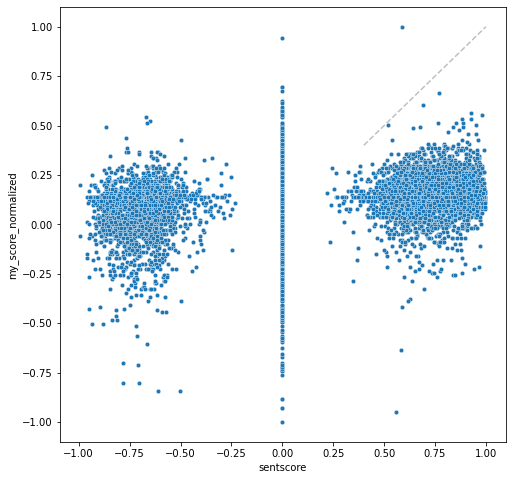

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.scatterplot(data=concatdata, x='sentscore', y='my_score_normalized', s=20)
plt.plot([0.4,1], [0.4,1], ls='--', alpha=0.5, color='grey')

- nan제거

In [32]:
concatdata1 = concatdata[~concatdata['text'].isna()].reset_index(drop=True)

In [33]:
concatdata1.shape

(25023, 10)

# summa 라이브러리 이용해서 문장 추출적 요약

In [34]:
from summa.summarizer import summarize

def summarize_text(text, word_limit=50):
    words = text.split()
    ratio = word_limit / len(words)
    return summarize(text, ratio)

In [35]:
for i in tqdm(concatdata1.index, total=len(concatdata1)):
    text = concatdata1.at[i, 'text']
    summar = summarize_text(text)
    concatdata1.at[i, 'summarize'] = summar

100%|██████████| 25023/25023 [01:15<00:00, 331.87it/s]


In [36]:
concatdata1[['summarize']]

,summarize
0,"━ 배달비 떨어졌지만...""코로나 시기가 특수, 균형 찾은 것"" ━ © MoneyT..."
1,로이터연합뉴스 [서울경제] 연방준비제도(Fed-연준) 내 대표적인 '비둘기파' 인사...
2,ENA채널 '이상한 변호사 우영우' 지난달 28일 방송된 10회에서는 장애인의 사랑...
3,"""복지팽창-연금악화 해결하려면 사적 연금 역할 강화해야"" 이미지 확대보기 초고령사회..."
4,[아시아경제 이정윤 기자] 알트코인 대장격인 이더리움 가격이 최근 들어 가파른 상승...
...,...
25018,3일 금융감독원 전자공시시스템에 따르면 매매일 기준 지난 한 달(5월1~31일) 간...
25019,서울 삼성 서초사옥서 3일 열린 관계사 최고경영진 간담회장에 나타난 이찬희 위원장은...
25020,광고 이 위원장은 이날 서울 삼성 서초사옥에서 열린 관계사 최고경영진 간담회 참석에...
25021,"삼성준법감시위원회는 3일 삼성전자 서초사옥 회의실에서 삼성전자, 삼성SDI, 삼성전..."


# gensim라이브러리 사용해서 토픽 모델링(LDA)

In [37]:
# 필요한 라이브러리를 가져옵니다.
import gensim
from gensim import corpora
from gensim.models import LdaModel
from konlpy.tag import Okt

# 문장을 입력받아 토픽 모델링을 수행하는 함수를 정의합니다.
def topic_modeling(text):
    # Okt 형태소 분석기를 사용하여 문장을 토큰화합니다.
    okt = Okt()
    tokens = okt.nouns(text)

    # 토큰화된 문장을 바탕으로 사전을 생성합니다.
    dictionary = corpora.Dictionary([tokens])

    # 사전을 바탕으로 문서-단어 행렬을 생성합니다.
    corpus = [dictionary.doc2bow(token) for token in [tokens]]

    # LDA 모델을 학습시킵니다.
    lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary)

    # 학습된 모델을 바탕으로 주제를 추출합니다.
    topics = lda_model.print_topics(num_words=5)

    return topics[0][1]

In [38]:
import re

def extract_words(text):
    pattern = r'\"(.+?)\"'
    words = re.findall(pattern, text)
    return words

- 0.025*"장학금" + 0.021*"근로자" + 0.021*"중소기업" + 0.021*"기업은행" + 0.017*"나눔" 식으로 나오면 단어만 추출하도록 하기

In [39]:
from tqdm import tqdm

# 'topics' 컬럼 초기화
concatdata1['topics'] = None

for i in tqdm(range(len(concatdata1)), desc='Processing'):
    text = concatdata1.at[i, 'text']
    topics = topic_modeling(text)
    topics = extract_words(topics)
    concatdata1.at[i, 'topics'] = topics

Processing: 100%|██████████| 25023/25023 [11:46<00:00, 35.43it/s]


In [40]:
concatdata1[['topics']]

,topics
0,"[택시, 배달, 것, 라이더, 수요]"
1,"[준, 것, 총재, 시장, 금리]"
2,"[우영, 이준호, 사랑, 변호사, 우의]"
3,"[연금, 소득, 해지, 율, 관]"
4,"[리움, 더, 가격, 업그레이드, 가상]"
...,...
25018,"[매입, 주식, 임원, 전자, 주가]"
25019,"[삼성, 준법, 사장, 국민, 사면]"
25020,"[준법, 삼성, 위, 경영, 사면]"
25021,"[경영, 준법, 삼성, 최고, 위원회]"


# 워드 클라우드

- 월별로 토픽 모음

In [41]:
tmp_df = pd.DataFrame(concatdata1.groupby('date')['topics'].sum())
tmp_df

,topics
date,
20220204,"[횡령, 김씨, 주식, 것, 경찰, 아파트, 법인, 채, 원, 투기, 아파트, 법인..."
20220304,"[쿠팡, 매출, 증가, 것, 개선, 쿠팡, 지난해, 매출, 적자, 물류, 클럽, 회..."
20220404,"[명, 장학금, 지원, 선발, 지역, 장학금, 지역, 대표, 보성, 지원, 안전, ..."
20220504,"[및, 독점, 금지, 제한, 가지, 스마일, 혜택, 멤버십, 배송, 상품, 실적, ..."
20220604,"[기업, 회사, 매출, 마감, 송파구, 비트코인, 지수, 수, 바닥, 점, 기업, ..."
20220704,"[것, 중국, 통화정책, 은행, 정책, 게임, 한국, 텐센트, 중국, 회사, 중국,..."
20220804,"[택시, 배달, 것, 라이더, 수요, 준, 것, 총재, 시장, 금리, 우영, 이준호..."


In [42]:
tmp_df['topics'].values[0]

['횡령',
 '김씨',
 '주식',
 '것',
 '경찰',
 '아파트',
 '법인',
 '채',
 '원',
 '투기',
 '아파트',
 '법인',
 '원',
 '투기',
 '채',
 '사업',
 '지원',
 '등',
 '기업',
 '개',
 '연봉',
 '구자욱',
 '박해민',
 '전',
 '명의',
 '산업',
 '국가',
 '나노',
 '계획',
 '산단',
 '램프',
 '티',
 '토트넘',
 '브라이턴',
 '콘테',
 '운용',
 '옵션',
 '디폴트',
 '자산',
 '퇴직',
 '분',
 '주식',
 '바',
 '넷마블',
 '사업',
 '운용',
 '국내',
 '기업',
 '변화',
 '등',
 '콘텐츠',
 '넷플릭스',
 '한국',
 '공개',
 '지금',
 '게임',
 '인수',
 '소니',
 '메타',
 '것',
 '폴란드',
 '원전',
 '은',
 '스포츠',
 '텐센트',
 '경제',
 '우리',
 '국무회의',
 '수출',
 '주문',
 '주가',
 '실적',
 '상승',
 '지수',
 '고용',
 '건',
 '아파트',
 '거래',
 '지난해',
 '매매',
 '게임',
 '넷마블',
 '블록',
 '체인',
 '것',
 '지원',
 '자금',
 '업체',
 '괴산군',
 '중소기업',
 '취득세',
 '거래',
 '법인',
 '이하',
 '지방',
 '관광',
 '기업',
 '창업',
 '사업',
 '처',
 '뉴스',
 '본문',
 '서울',
 '글씨',
 '이재명',
 '신한은행',
 '글로벌',
 '금융',
 '위',
 '등',
 '김건우',
 '선발',
 '수',
 '기사',
 '분석',
 '급등',
 '배',
 '수익률',
 '신청',
 '개장',
 '하이닉스',
 '것',
 '올해',
 '수요',
 '시장',
 '거래',
 '상승',
 '날',
 '전',
 '장',
 '분양',
 '가구',
 '물량',
 '경기',
 '단지',
 '회장',
 '권',
 '혐의',
 '기일',
 '첫',
 '회장',
 '권',
 '

In [43]:
tmp_df['topics'].values[2]

['명',
 '장학금',
 '지원',
 '선발',
 '지역',
 '장학금',
 '지역',
 '대표',
 '보성',
 '지원',
 '안전',
 '화재',
 '전통',
 '시장',
 '전기',
 '꽃가루',
 '꽃',
 '농가',
 '은행',
 '등',
 '꽃가루',
 '꽃',
 '은행',
 '농가',
 '등',
 '연금',
 '개혁',
 '사적',
 '공적',
 '수',
 '연금',
 '개혁',
 '것',
 '보험료',
 '수령',
 '등',
 '부당',
 '방안',
 '업계',
 '콘서트',
 '보험료',
 '비중',
 '소득',
 '지출',
 '보험',
 '앱',
 '것',
 '보험사',
 '소비자',
 '로그인',
 '보험',
 '생명',
 '손해',
 '불완전',
 '판매',
 '퇴직',
 '희망',
 '확대',
 '화생',
 '지난해',
 '자본',
 '발행',
 '증권',
 '후순위채',
 '보험사',
 '상품',
 '등',
 '판매',
 '점검',
 '및',
 '방송',
 '것',
 '프로그램',
 '협찬',
 '상담',
 '부동산',
 '협회',
 '두산건설',
 '그룹',
 '익',
 '지원',
 '기업',
 '부산',
 '개',
 '금융',
 '백전',
 '부산',
 '서비스',
 '은행',
 '신규',
 '일자리',
 '고용',
 '분야',
 '디지털',
 '개',
 '일자리',
 '개',
 '계획',
 '추진',
 '고용',
 '창업',
 '부산',
 '지역',
 '기업',
 '대표',
 '부산',
 '창업',
 '지역',
 '기업',
 '대표',
 '구매',
 '기업',
 '사회',
 '우선',
 '제도',
 '인재',
 '부안군',
 '육성',
 '재단',
 '근농',
 '간호학',
 '창신대',
 '부영',
 '간호사',
 '졸업',
 '사업',
 '활성화',
 '조성',
 '도시재생',
 '주민',
 '시장',
 '달러',
 '기업',
 '발행',
 '채권',
 '시장',
 '기업',
 '달러',
 '발행',
 '채권',
 '비트코인

- 워드클라우드

In [44]:
# 빈도수 처리
m2= tmp_df['topics'].values[0]
ko = nltk.Text(m2, name='2월')
ko

<Text: 2월>

In [45]:
m2

['횡령',
 '김씨',
 '주식',
 '것',
 '경찰',
 '아파트',
 '법인',
 '채',
 '원',
 '투기',
 '아파트',
 '법인',
 '원',
 '투기',
 '채',
 '사업',
 '지원',
 '등',
 '기업',
 '개',
 '연봉',
 '구자욱',
 '박해민',
 '전',
 '명의',
 '산업',
 '국가',
 '나노',
 '계획',
 '산단',
 '램프',
 '티',
 '토트넘',
 '브라이턴',
 '콘테',
 '운용',
 '옵션',
 '디폴트',
 '자산',
 '퇴직',
 '분',
 '주식',
 '바',
 '넷마블',
 '사업',
 '운용',
 '국내',
 '기업',
 '변화',
 '등',
 '콘텐츠',
 '넷플릭스',
 '한국',
 '공개',
 '지금',
 '게임',
 '인수',
 '소니',
 '메타',
 '것',
 '폴란드',
 '원전',
 '은',
 '스포츠',
 '텐센트',
 '경제',
 '우리',
 '국무회의',
 '수출',
 '주문',
 '주가',
 '실적',
 '상승',
 '지수',
 '고용',
 '건',
 '아파트',
 '거래',
 '지난해',
 '매매',
 '게임',
 '넷마블',
 '블록',
 '체인',
 '것',
 '지원',
 '자금',
 '업체',
 '괴산군',
 '중소기업',
 '취득세',
 '거래',
 '법인',
 '이하',
 '지방',
 '관광',
 '기업',
 '창업',
 '사업',
 '처',
 '뉴스',
 '본문',
 '서울',
 '글씨',
 '이재명',
 '신한은행',
 '글로벌',
 '금융',
 '위',
 '등',
 '김건우',
 '선발',
 '수',
 '기사',
 '분석',
 '급등',
 '배',
 '수익률',
 '신청',
 '개장',
 '하이닉스',
 '것',
 '올해',
 '수요',
 '시장',
 '거래',
 '상승',
 '날',
 '전',
 '장',
 '분양',
 '가구',
 '물량',
 '경기',
 '단지',
 '회장',
 '권',
 '혐의',
 '기일',
 '첫',
 '회장',
 '권',
 '

In [46]:
# returns number of tokens (document length)
print(len(ko.tokens))

25096


In [47]:
# returns number of unique tokens (중복값을 뺀 토큰 수)
# set : 중복이 없는 집합함수 뽑아주는 메서드

print(len(set(ko.tokens)))

3458


In [48]:
# 빈도수로 정리
# returns frequency distribution

ko.vocab()

FreqDist({'기사': 502, '기업': 492, '등': 454, '것': 434, '사업': 335, '거래': 277, '전체': 277, '보호': 274, '회원': 270, '시장': 262, ...})

In [49]:
# 불용어 처리
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번','호','을','이','다','만','로','가','를', '것','등']

In [50]:
my_dict = dict(ko.vocab())

# 특정 키를 제거하는 함수
def remove_key(dictionary, key):
    for k in key:
        if k in dictionary:
            del dictionary[k]

# 'key2'를 제거
remove_key(my_dict, stop_words)

# print(my_dict)

In [51]:
# 딕셔너리 값을 기준으로 정렬된 튜플 리스트 생성
sorted_tuples = sorted(my_dict.items(), key=lambda x: x[1])

# 정렬된 튜플 리스트를 다시 딕셔너리로 변환
sorted_dict = {k: v for k, v in sorted_tuples}

# print(sorted_dict)

In [52]:
sliced_dict = dict(list(sorted_dict.items())[-10:])

In [106]:
import matplotlib as mpl
mpl.font_manager._rebuild()

In [107]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts()
for font_path in font_list:
    font_name = fm.get_font(font_path).family_name
    print(font_name)

KacstTitleL
Kinnari
DejaVu Sans Mono
Rekha
Keraleeyam
Norasi
Nakula
Padauk
DejaVu Serif
Padauk Book
Ubuntu
Khmer OS System
Source Code Pro
AnjaliOldLipi
Lohit Odia
Liberation Sans
Samyak Devanagari
DejaVu Serif
Standard Symbols PS
Samanata
DejaVu Sans Mono
Yrsa
Rachana
RaghuMalayalamSans
P052
Source Code Pro
Source Code Pro
padmaa
ori1Uni
padmaa-Bold.1.1
Laksaman
Liberation Sans
Kalimati
Loma
Ubuntu
Liberation Sans
DejaVu Serif
Nimbus Sans Narrow
FreeSans
KacstBook
Lohit Malayalam
Ubuntu
Ubuntu
Ubuntu Mono
DejaVu Serif
Tlwg Typewriter
Norasi
Liberation Serif
DejaVu Serif
Umpush
Tlwg Typo
Liberation Mono
Liberation Serif
KacstTitle
Lohit Tamil
OpenSymbol
Sawasdee
URW Gothic
Liberation Sans
cmex10
Noto Mono
URW Bookman
KacstArt
Liberation Serif
Waree
Lohit Bengali
Ubuntu
Bitstream Vera Sans Mono
Chilanka
C059
Ubuntu
Source Code Pro
Sawasdee
Noto Serif CJK JP
DejaVu Sans Mono
Bitstream Vera Sans
Lohit Assamese
Tlwg Typo
Noto Sans CJK JP
DejaVu Serif
Abyssinica SIL
Bitstream Vera Serif
Pad

RuntimeError: In FT2Font: Could not set the fontsize (error code 0x17)

In [108]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Garuda"

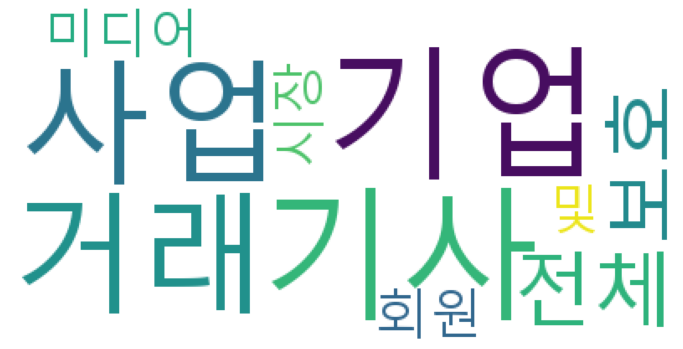

In [53]:
# 시각화
wordcloud = WordCloud(font_path='/home/crb123/from113/watson_ko/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(sliced_dict)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()